# Extra Assignment: QR Factorization and Eigenvalue Computation

## Objective
In this assignment, you will explore different approaches to QR factorization and apply them to compute eigenvalues using the unshifted QR algorithm. The goal is to analyze the performance, accuracy, and numerical stability of different methods.

## Learning Outcomes
By completing this assignment, you will:
- Implement QR factorization using **Givens rotations**.
- Compare it with **Householder reflections** (which was covered in class).
- Utilize **NumPy's built-in QR factorization** for reference.
- Apply the **unshifted QR algorithm** to compute eigenvalues.
- Analyze the performance and accuracy of these methods.

## Background
QR factorization decomposes a matrix $A$ into an orthogonal matrix $Q$ and an upper triangular matrix $R$:
$$
A = QR
$$
This decomposition is fundamental in solving least squares problems and in computing eigenvalues using iterative methods such as the **QR algorithm**.

The **unshifted QR algorithm** consists of iteratively factorizing a matrix into $QR$, then updating it as:
$$
A_{k+1} = R_k Q_k
$$
This process typically converges to an upper triangular matrix whose diagonal entries approximate the eigenvalues of $A$.


## Why Compare Different Methods?

- **Givens rotations** are numerically stable and efficient for sparse matrices.
- **Householder reflections** are widely used due to their efficiency in dense matrices.
- **NumPy's built-in QR** is optimized and serves as a benchmark.
- Comparing these approaches helps in understanding their trade-offs.


---

## **Givens Rotations: An Overview**  

Givens rotations are a technique used in numerical linear algebra to introduce zeros into matrices. They are particularly useful for QR factorization and solving least squares problems. Unlike Householder reflections, which operate on entire columns, Givens rotations only affect two rows at a time, making them efficient for sparse matrices.

#### Definition of a Givens Rotation
A **Givens rotation** is a special orthogonal transformation represented by a rotation matrix $G(i, j, \theta)$ that operates on two coordinates (rows) of a matrix:

$$
G(i, j, \theta) =
\begin{bmatrix}
1 &  &  &  &  \\
& \ddots &  &  &  \\
&  & c & s &  \\
&  & -s & c &  \\
&  &  &  & \ddots \\
\end{bmatrix}
$$

where $c = \cos(\theta)$ and $s = \sin(\theta)$. The rotation only affects rows $i$ and $j$ of the matrix.


#### Zeroing Out a Matrix Entry
Given a matrix $A$, we want to introduce a zero in position $A_{j,k}$ while preserving the norm of the affected elements. The Givens rotation achieves this by choosing:
$$
c = \frac{a}{\sqrt{a^2 + b^2}}, \quad s = \frac{b}{\sqrt{a^2 + b^2}}
$$
where $a = A_{i,k}$ and $b = A_{j,k}$.

Applying $G(i, j, \theta)$ on the left of $A$ updates only the rows $i$ and $j$ as follows:
$$
\begin{bmatrix} c & s \\ -s & c \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} \sqrt{a^2 + b^2} \\ 0 \end{bmatrix}
$$

This ensures that the entry $A_{j,k}$ is zeroed out.


#### *Example done in class*

Find a Givens rotation $G$ with the property that $GA$ has a zero entry in the second row and first column, where  

$$
A =
\begin{bmatrix}
3 & 1 & 0 \\
1 & 3 & 1 \\
0 & 1 & 3
\end{bmatrix}.
$$

*Solution:* The form of $G$ is  

$$
G =
\begin{bmatrix}
\cos\theta & \sin\theta & 0 \\
-\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

so  

$$
GA =
\begin{bmatrix}
3\cos\theta + \sin\theta & \cos\theta + 3\sin\theta & \sin\theta \\
-3\sin\theta + \cos\theta & -\sin\theta + 3\cos\theta & \cos\theta \\
0 & 1 & 3
\end{bmatrix}.
$$

The angle $\theta$ is chosen so that $-3\sin\theta + \cos\theta = 0$, that is, so that $\tan\theta = \frac{1}{3}$. Hence  

$$
\cos\theta = \frac{3\sqrt{10}}{10}, \quad \sin\theta = \frac{\sqrt{10}}{10}.
$$

and  

$$
GA =
\begin{bmatrix}
\frac{3\sqrt{10}}{10} & \frac{\sqrt{10}}{10} & 0 \\
-\frac{\sqrt{10}}{10} & \frac{3\sqrt{10}}{10} & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
3 & 1 & 0 \\
1 & 3 & 1 \\
0 & 1 & 3
\end{bmatrix}
=
\begin{bmatrix}
\sqrt{10} & \frac{3}{5}\sqrt{10} & \frac{1}{10}\sqrt{10} \\
0 & \frac{4}{5}\sqrt{10} & \frac{3}{10}\sqrt{10} \\
0 & 1 & 3
\end{bmatrix}.
$$

Note that the resulting matrix is neither symmetric nor tridiagonal.

#### QR Factorization Using Givens Rotations

To compute the QR decomposition using Givens rotations:
1. Start with $A$ and initialize $Q$ as an identity matrix.
2. For each subdiagonal element $A_{j,k}$ (where $j > k$), apply a Givens rotation to zero it out.
3. Multiply $Q$ by each rotation matrix $G(i, j, \theta)$ in sequence.
4. The final $Q$ is the product of all Givens rotations, and $R$ is the transformed upper triangular matrix.

#### Advantages and Disadvantages

**Advantages:**
- Efficient for **sparse** matrices since it only modifies two rows at a time.
- **Numerically stable** since it relies on orthogonal transformations.
- Parallelizable for certain architectures.

**Disadvantages:**
- Computationally more expensive than Householder reflections for dense matrices (since each element must be zeroed out individually).
- More complex to implement than the standard Gram-Schmidt process.

#### Application to Eigenvalue Computation

Givens rotations can be used in the **unshifted QR algorithm**, where repeated QR factorizations are applied to approximate the eigenvalues of a matrix. Since Givens rotations maintain numerical stability, they are effective for iterative QR methods.




---

## Tasks
### **Task 1: QR Factorization using Givens Rotations**
1. Implement QR factorization using **Givens rotations**.
2. Test your implementation on a sample matrix and verify the results.

### **Task 2: QR Factorization using Householder Reflections**
1. Implement QR factorization using **Householder reflections** (or reuse your class implementation).
2. Compare its performance and results with the Givens rotations method.

### **Task 3: QR Factorization using NumPy**
1. Use `numpy.linalg.qr` to compute the QR decomposition.
2. Compare its results with your previous implementations.

### **Task 4: Eigenvalues via the Unshifted QR Algorithm**
1. Implement the **unshifted QR method** for eigenvalue computation.
2. Apply it using:
   - Givens rotations
   - Householder reflections
   - NumPy's QR factorization
3. Analyze the convergence behavior and accuracy.

### **Task 5: Performance Comparison and Discussion**
1. Compare the computational efficiency of the three QR methods.
2. Discuss numerical stability and accuracy.
3. Provide plots (if necessary) to illustrate convergence differences.
4. Conclude which method is preferable in different scenarios.

---

## Implementation Details
- Use Python and NumPy for implementation.
- Ensure code is well-commented and modular.
- Test with different matrices (e.g., random, symmetric, and non-symmetric matrices).
- Use relative errors to compare accuracy.
- Measure execution time for performance analysis.

---


## Implemention
### Implementation of QR Algorithm and QR Factorization using Givens rotation
Let's implement the QR factorization with Givens rotation that returns two matrices $Q$ and $R$ such that 
$$R = G_r\cdots G_2G_1A \quad\text{  and  }\quad Q = G_1^TG_2^T\cdots G_r^T$$
where $G_i$ is a Givens rotation and $r \leq n(n-1)$ (the number of subdiagonal entries of a $n\times n$ matrix)

In [1]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: " {0:0.3f}".format(x) if x > 0 else "{0:0.3f}".format(x)})

class GivensQR():
    """QR Factorization by Givens Rotation"""

    @classmethod
    def givens_rotation(cls, a, b):
        """Given the elements a=Aik and b=Ajk, returns the Givens Rotation to zero out Ajk"""
        c = a / np.sqrt(a**2 + b**2)
        s = b / np.sqrt(a**2 + b**2)
        return np.array([
            [c, s],
            [-s, c]
        ])

    @classmethod
    def qr(cls, A):
        """QR factorization for square matrices using Givens rotations"""
        n = A.shape[0]
        it = 0
        Q = np.eye(n)
        R = A.copy().astype(float)
        for j in range(n):
            for i in range(j+1, n):
                if R[i, j]!=0:
                    G = cls.givens_rotation(R[j, j], R[i, j])
                    R[[j, i], j:]= G @ R[[j, i], j:]
                    Q[:, [j, i]] = Q[:, [j, i]] @ G.T
                    it += 1
        return Q, R
    
    @classmethod
    def solve(cls, A, k=100):
        """Unshifted QR Algorithm for Section 4"""
        n = A.shape[0]
        Q = np.eye(n)
        Qbar = Q.copy().astype(float)
        R = A.copy().astype(float)

        for _ in range(k):
            Q, R = cls.qr(R @ Q)
            Qbar = Qbar @ Q  # Accumulate Q’s

        lam = np.diag(R @ Q)  # Diagonal elements converge to eigenvalues
        return lam, Qbar


### Implementation of QR Algorithm and QR Factorization using Householder matrices
We can take the code for Householder matrices from optional assignment 4 and apply it to the QR Method and the QR Algorithm.

In [2]:
class HouseholderQR():
    """Stands for QR Factorization by Householder Reflections"""

    @classmethod
    def householder(cls, u):
        """Construct the householder matrix given a vector u: nx1"""
        n = u.shape[0]
        u = u/np.linalg.norm(u)
        return np.eye(n) - 2*np.outer(u, u)

    @classmethod
    def qr(cls, A):
        """QR factorization for square matrices using Householder reflections"""
        n = A.shape[0]
        Q = np.eye(n)
        R = A.copy().astype(float)
        for i in range(n-1):
            x = R[i:, i]
            Hx = np.zeros(n-i) 
            Hx[0] = -np.sign(x[0]) * np.linalg.norm(x)
            H = cls.householder(x-Hx)
            R[i:, :] = H @ R[i:, :]
            Q[:, i:] = Q[:, i:] @ H

        return Q, R
    
    @classmethod
    def solve(cls, A, k):
        """Unshifted QR Algorithm for Section 4"""
        n = A.shape[0]
        Q = np.eye(n)
        Qbar = Q.copy().astype(float)
        R = A.copy().astype(float)

        for _ in range(k):
            Q, R = cls.qr(R @ Q)  # NumPy QR factorization
            Qbar = Qbar @ Q  # Accumulate Q’s

        lam = np.diag(R @ Q)  # Diagonal elements converge to eigenvalues
        return lam, Qbar

### Implementation of QR Algorithm using `np.linalg.qr()`

In [3]:
class NumpyQR():
    @classmethod
    def solve(cls, A, k):
        """Unshifted QR Algorithm using numpy's qr algorithm"""
        n = A.shape[0]
        Q = np.eye(n)
        Qbar = Q.copy()
        R = A.copy()

        for _ in range(k):
            Q, R = np.linalg.qr(R @ Q)  # NumPy QR factorization
            Qbar = Qbar @ Q  # Accumulate Q’s

        lam = np.diag(R @ Q)  # Diagonal elements converge to eigenvalues
        return lam, Qbar

## Performance comparison

### Test implemented QR Factorizations against `np.linalg.qr()` 
We perform a test to see that it works as espected for both implemeted methods

In [4]:
# TEST
A = np.array([
    [3, 1, 0],
    [1, 3, 1],
    [0, 1, 3]
])
Q, R = GivensQR.qr(A)
print(Q, "\n", R)
Q, R = HouseholderQR.qr(A)
print("\n", Q, "\n", R)
Q, R = np.linalg.qr(A)
print("\n", Q, "\n", R)

[[ 0.949 -0.294  0.116]
 [ 0.316  0.882 -0.349]
 [0.000  0.368  0.930]] 
 [[ 3.162  1.897  0.316]
 [0.000  2.720  1.985]
 [0.000 -0.000  2.441]]

 [[-0.949  0.294  0.116]
 [-0.316 -0.882 -0.349]
 [0.000 -0.368  0.930]] 
 [[-3.162 -1.897 -0.316]
 [0.000 -2.720 -1.985]
 [0.000  0.000  2.441]]

 [[-0.949  0.294  0.116]
 [-0.316 -0.882 -0.349]
 [-0.000 -0.368  0.930]] 
 [[-3.162 -1.897 -0.316]
 [0.000 -2.720 -1.985]
 [0.000 0.000  2.441]]


### Compare the different Unshifted QR Methods

In [14]:
def generate_symmetric_matrix(N):
    A = np.random.rand(N, N)
    return (A + A.T) / 2  # Ensure symmetry

k=100
N_values = [4, 8, 16, 32, 64, 96, 128]
matrices = [generate_symmetric_matrix(N) for N in N_values]
for A in matrices:
    Q, R = GivensQR.solve(A, k)
    # print(Q, R)
    Q, R = HouseholderQR.solve(A, k)
    # print(Q, R)
    Q, R = NumpyQR.solve(A, k)
    # print(Q, R)


### Performance comparison

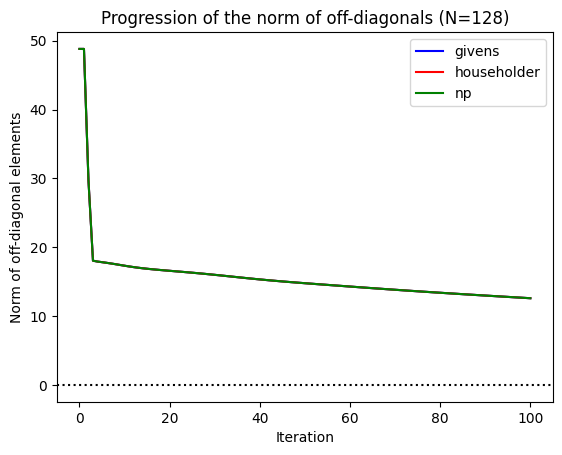

In [16]:
import matplotlib.pyplot as plt

class MatrixOperations():
    @staticmethod
    def off_diag_norm(A: np.ndarray) -> float:
        off_diag = np.tril(np.abs(A - np.diag(np.diag(A))),-1)
        return np.linalg.norm(off_diag)

class TestGivensQR(GivensQR):
    @classmethod
    def solve(cls, A, k=100):
        """Unshifted QR Algorithm for Section 4"""
        n = A.shape[0]
        Q = np.eye(n)
        Qbar = Q.copy().astype(float)
        R = A.copy().astype(float)
        norms = [MatrixOperations.off_diag_norm(R)]

        for _ in range(k):
            RQ = R @ Q
            Q, R = cls.qr(RQ)  # NumPy QR factorization
            Qbar = Qbar @ Q  # Accumulate Q’s
            norms.append(MatrixOperations.off_diag_norm(RQ))

        lam = np.diag(R @ Q)  # Diagonal elements converge to eigenvalues
        return lam, Qbar, norms
    
class TestHouseholderQR(HouseholderQR):
    @classmethod
    def solve(cls, A, k):
        """Unshifted QR Algorithm for Section 4"""
        n = A.shape[0]
        Q = np.eye(n)
        Qbar = Q.copy().astype(float)
        R = A.copy().astype(float)
        norms = [MatrixOperations.off_diag_norm(R)]

        for _ in range(k):
            RQ = R @ Q
            Q, R = cls.qr(RQ)  # NumPy QR factorization
            Qbar = Qbar @ Q  # Accumulate Q’s
            norms.append(MatrixOperations.off_diag_norm(RQ))

        lam = np.diag(R @ Q)  # Diagonal elements converge to eigenvalues
        return lam, Qbar, norms
    
class TestNumpyQR(NumpyQR):
    @classmethod
    def solve(cls, A, k):
        """Unshifted QR Algorithm using numpy's qr algorithm"""
        n = A.shape[0]
        Q = np.eye(n)
        Qbar = Q.copy()
        R = A.copy()
        norms = [MatrixOperations.off_diag_norm(R)]
                 
        for _ in range(k):
            RQ = R @ Q
            Q, R = np.linalg.qr(RQ)  # NumPy QR factorization
            Qbar = Qbar @ Q  # Accumulate Q’s
            norms.append(MatrixOperations.off_diag_norm(RQ))

        lam = np.diag(R @ Q)  # Diagonal elements converge to eigenvalues
        return lam, Qbar, norms

matrix = matrices[-1]
k = 100
results1 = TestGivensQR.solve(matrix, k)
results2 = TestHouseholderQR.solve(matrix, k)
results3 = TestNumpyQR.solve(matrix, k)
plt.plot(results1[2], label='givens', color='blue')
plt.plot(results2[2], label='householder', color='red')
plt.plot(results3[2], label='np', color='green')
plt.axline((0, 0), linestyle='dotted', slope=0, color='black')
plt.xlabel('Iteration')
plt.ylabel('Norm of off-diagonal elements')
plt.title(f'Progression of the norm of off-diagonals (N={matrix.shape[0]})')
plt.legend()
plt.show()


### Time comparison

Let's compare the time efficiency of each unshifted QR algorithm by benchmarking, using Jupyter Notebook's provided magic commands `%%timeit`

In [7]:
class TestGivensQR(GivensQR):
    @classmethod
    def solve(cls, A, k=100):
        """Unshifted QR Algorithm for Section 4"""
        Q = np.eye(A.shape[0])
        Qbar = Q.copy().astype(float)
        R = A.copy().astype(float)

        for _ in range(k):
            Q, R = cls.qr(R @ Q)  # NumPy QR factorization
            Qbar = Qbar @ Q  # Accumulate Q’s

        lam = np.diag(R @ Q)  # Diagonal elements converge to eigenvalues
        return lam, Qbar
    
class TestHouseholderQR(HouseholderQR):
    @classmethod
    def solve(cls, A, k):
        """Unshifted QR Algorithm for Section 4"""
        Q = np.eye(A.shape[0])
        Qbar = Q.copy().astype(float)
        R = A.copy().astype(float)

        for _ in range(k):
            Q, R = cls.qr(R @ Q)  # NumPy QR factorization
            Qbar = Qbar @ Q  # Accumulate Q’s

        lam = np.diag(R @ Q)  # Diagonal elements converge to eigenvalues
        return lam, Qbar
    
class TestNumpyQR(NumpyQR):
    @classmethod
    def solve(cls, A, k):
        """Unshifted QR Algorithm using numpy's qr algorithm"""
        Q = np.eye(A.shape[0])
        Qbar = Q.copy()
        R = A.copy()
                 
        for _ in range(k):
            Q, R = np.linalg.qr(R @ Q)  # NumPy QR factorization
            Qbar = Qbar @ Q  # Accumulate Q’s

        lam = np.diag(R @ Q)  # Diagonal elements converge to eigenvalues
        return lam, Qbar

In [8]:
%%timeit
TestGivensQR.solve(matrix, k)

111 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%%timeit
TestHouseholderQR.solve(matrix, k)

969 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%%timeit
TestNumpyQR.solve(matrix, k)

500 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This shows that the QR Factorization implemented by `numpy` is 10 times and 100 times faster compared to QR factorization by Householder Reflexions and Givens Rotations repectively. 

But of course, Givens rotations works best when we are given a sparse matrix. Therefore, we should also tests the three algorithms using a sparse matrix.


In [25]:
from scipy.sparse import random as sparse_random

sparse_matrix = sparse_random(128, 128, density=0.2, format='csr', dtype=np.float64).toarray()

In [34]:
%%timeit
TestGivensQR.solve(sparse_matrix, k)

8.02 s ± 25.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%%timeit
TestHouseholderQR.solve(sparse_matrix, k)

941 ms ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%%timeit
TestNumpyQR.solve(sparse_matrix, k)

537 ms ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
